# Exploratory Data Analysis

If you want to understand your company, you need data. You might try to look at charts and reports that summarize your company’s data, but no prepared report can tell you as much as you’ll learn by diving into the data yourself.


## Finding Patterns in Datasets

### Bike-Sharing Service

### Getting the data

In [77]:
import pandas as pd
hour = pd.read_csv('hour.csv')
hour.head() # Shows first five rows of data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Calculating Summary Statistics

Here, we access the count column of our hour dataset and calculate the mean

In [78]:
hour['count'].mean()

189.46308763450142

In addition to calculating the mean, we can also calculate other important metrics

In [79]:
hour['count'].median() # median of the count column

142.0

Standard deviation is a measurement of how far spread out a set of numbers is. It's useful to help us understand the amount of variation that exists in ridership counts between hours in our data.

In [80]:
hour['count'].std() # standard deviation of the count variable

181.38759909186527

We also calculate the minimum and maximum of the registered variable, using the min() and max() methods, respectively. The number of registered users ranges from 0 to 886, and this tells us the hourly record you’ve set, and the record you’ll need to break if you want your business to do better than it ever has before.


In [81]:
hour['registered'].min()

0

In [82]:
hour['registered'].max()

886

*Knowing simple things like the mean number of customers on any hour of any day can help you understand how big your company is and how much room you have to grow.*

These summary statistics can also be combined with other information to tell us even more. For example, if you look up how much your company charges for one hour of bike usage, you can multiply that by the mean of the count column to get your total revenue over the two years covered by the data.

## A quick method to check summary statistics - describe()

In [83]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


The output of describe() also contains percentiles. The 25% row, for example contains the 25th percentile of each variable in the hour data. We can see that the 25th percentile of the count variable is 40, meaning that 25 percent of the hours in our dataset had 40 users or fewer, while 75 percent had more than 40 users.

- 25 percent of hours have fewer than 40 riders, but one hour had 886 riders. As the CEO, you may want more hours that have closer to 886 riders and fewer hours that have fewer than 40 riders.

- You could pursue this goal in many ways. For example, you might lower prices during the night to get more customers at that time and therefore have fewer hours with low ridership.

## Analyzing subsets of data

We’ve checked summary statistics related to the full dataset, and then considered offering lower prices at night to increase nighttime ridership. If we really want to pursue this idea, we should check summary statistics related to just the nighttime.

We can start by using the loc() method

In [84]:
hour.loc[3,'count']

13

- This loc() method allows us to specify a subset of our full data.

- When we use loc(), we specify the subset we want to select by using square brackets with this pattern: [*row,column*]. Here, we specify [3,'count'], indicating that we want to select row 3 of our data and the count column.

- The output we get from this is 13

*The fourth row of your data is called row 3, or we say its index is 3*

In [85]:
hour.loc[2:4, 'registered']

,registered
2,27
3,10
4,1


- By specifying 2:4 in the square brackets, we indicate that we want all the rows between row 2 and row 4, so we get three numbers as output: 27, 10, and 1.

- If you look at these rows, you can see that these observations are related to the hours 2 AM, 3 AM, and 4 AM.

Instead of looking at a few adjacent rows at a time, let’s look at all the
nighttime observations in our data

In [86]:
hour.loc[hour['hr'] < 5, 'registered']

,registered
0,13
1,32
2,27
3,10
4,1
...,...
17355,30
17356,13
17357,8
17358,1


 - hour['hr']<5, meaning that it will select every row in our data for which the value of the hr variable is less than 5. This will give us a subset of the data corresponding to the earliest hours of the morning (midnight to 4 AM)

We can specify multiple conditions for more complex logic. For example, we can check specifically for ridership counts on colder early mornings or warmer early mornings:


For a warm morning:

In [87]:
hour.loc[(hour['hr'] < 5) & (hour['temp'] > 0.5), 'count'].mean()

33.639322916666664

For a cold morning:

In [88]:
hour.loc[(hour['hr'] < 5) & (hour['temp'] < 0.5), 'count'].mean()

19.521104742053154

We can also use the | symbol to signify or. This could be useful in an example
like this:

In [89]:
hour.loc[(hour['temp']>0.5) | (hour['hum']>0.5), 'count'].mean()

193.36764103264582

- This line selects the mean readership count for rows with either high temperatures or high humidity—both aren’t required. Being able to select these complex conditions could help you choose ways to improve ridership during hours with uncomfortable weather.

## Seasonal Data

A nighttime discount is not the only possible strategy for improving ridership and revenue. You could also consider specials during certain seasons or at certain times of the year. In our data, the season variable records 1 for winter, 2 for spring, 3 for summer, and 4 for fall. We can use the groupby() method to find the mean number of users during each of these seasons:


In [90]:
hour.groupby(['season'])['count'].mean()


,count
season,
1,111.114569
2,208.344069
3,236.016237
4,198.868856


- We use the mean() method, indicating thatwe’re looking at averages.
- And we use ['count'] to access the count column of the data. So it’s already clear that we’re going to be looking at average ridership counts in our hour data.
- The only new part is groupby(['season']). This is a method that splits the
data into groups—in this case, one group for each unique value that appears in
the season column. The output shows us the mean ridership counts for each individual season:


Interpreting this output is straightforward: in the first season (winter),average ridership per hour is about 111.115; in the second season (spring),average ridership per hour is about 208.344; and so on. A definite seasonal pattern exists:
 - higher ridership in the spring and summer seasons, and lower ridership in the fall and winter.

The groupby() method can also group on multiple columns, as follows:


In [91]:
hour.groupby(['season','holiday'])['count'].mean()

season  holiday
1       0          112.685875
        1           72.042683
2       0          208.428472
        1          204.552083
3       0          235.976818
        1          237.822917
4       0          199.965998
        1          167.722222
Name: count, dtype: float64

- It shows us average ridership counts on holidays and non-holidays separately for each season.

- The result is that we can see the differences between holidays and non-holidays seasonally.

- It seems like holidays in the colder seasons have ridership that’s lower than that on non-holidays, and holidays in the warmer seasons have ridership that’s roughly equal to that on non-holidays.

**Understanding these differences can help you make decisions about how to run the business and might give you ideas about strategies you can pursue during different seasons or different holidays.**

## Visualizing Data

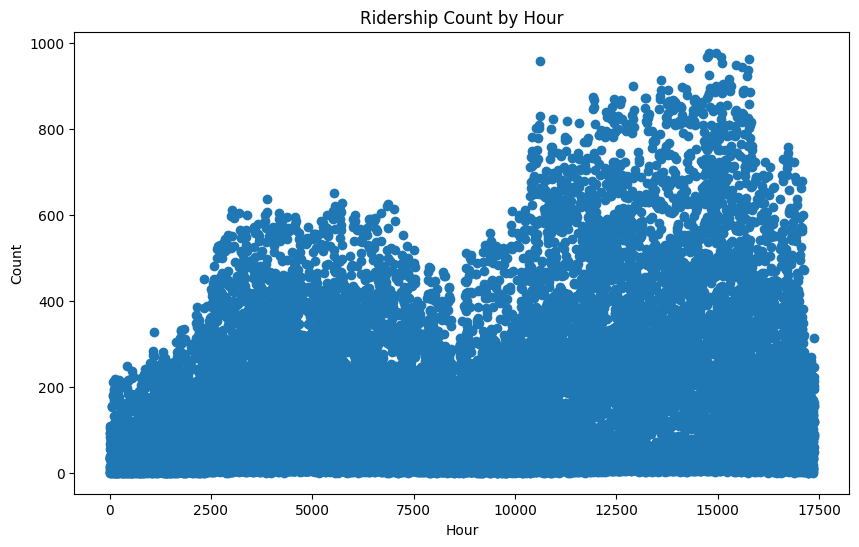

In [92]:
import matplotlib.pyplot as plt

# create a figure (fig) and an axis (ax)
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=hour['instant'],y=hour['count'])

plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Ridership Count by Hour")
plt.show()

## Plotting Subsets of Data

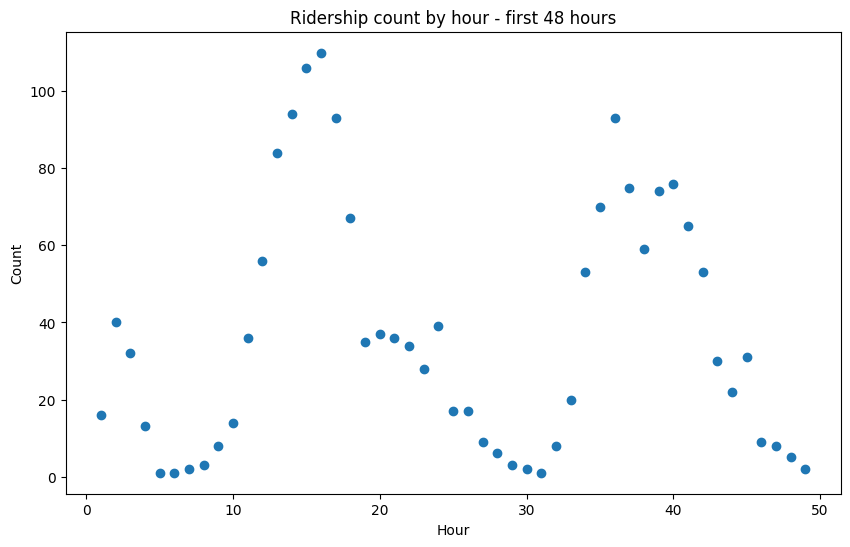

In [93]:
hour_first48 = hour.loc[0:48, :] # first 48 rows of data

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = hour_first48['instant'], y = hour_first48['count'])
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Ridership count by hour - first 48 hours")
plt.show()

When you have a big dataset, it’s a good idea to do both: plot the entire dataset at once (to understand the general, overall patterns) as well as plot smaller subsets of the data (to understand individual observations and smaller-scale patterns). In this case, we can see patterns within each day of the data in addition to the longer-term seasonal patterns within its years.

## Testing Different Plot Types

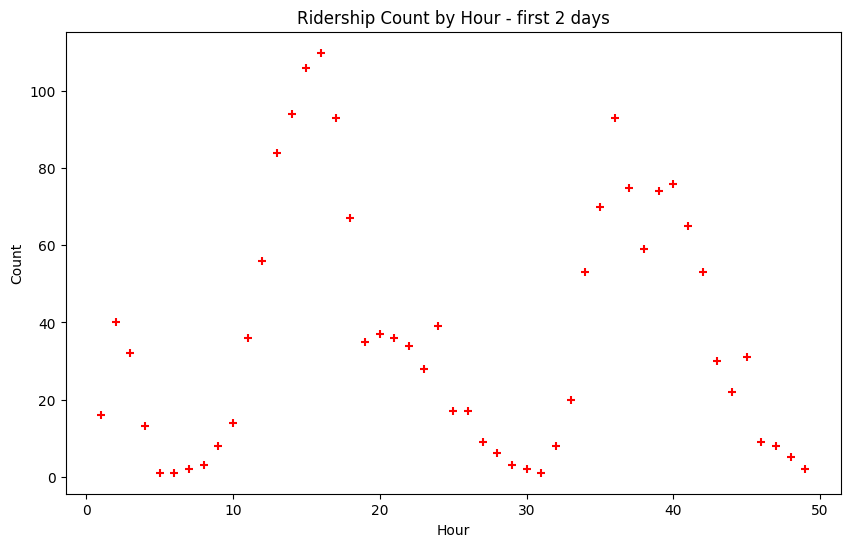

In [94]:
hour_first48 = hour.loc[0:48, :]

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(hour_first48['instant'], hour_first48['count'], c='r', marker='+')

plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Ridership Count by Hour - first 2 days')

plt.show()

## Let's try a line plot



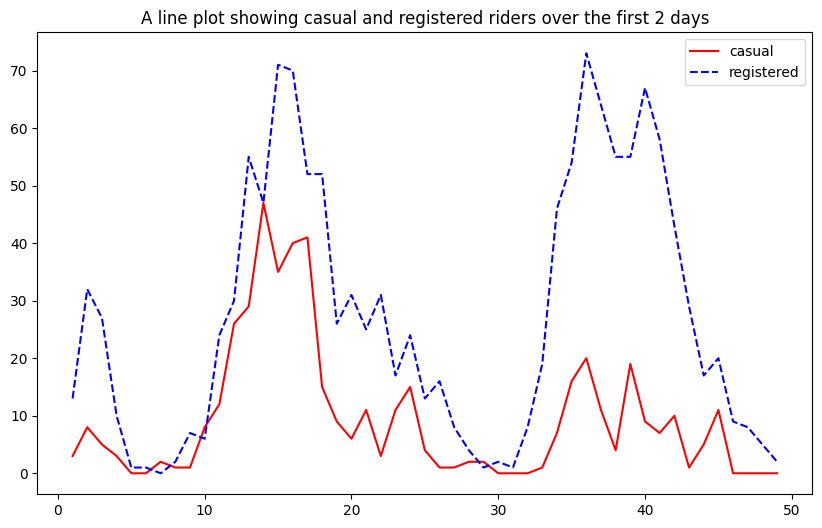

In [95]:
hour_first48 = hour.loc[0:48, :]

fix, ax = plt.subplots(figsize=(10, 6))
ax.plot(hour_first48['instant'], hour_first48['casual'], c = 'red', label = 'casual', linestyle = '-')
ax.plot(hour_first48['instant'], hour_first48['registered'], c = 'blue', label = 'registered', linestyle = '--')
plt.title("A line plot showing casual and registered riders over the first 2 days")
plt.legend()
plt.show()

In [96]:
hour_first48.loc[20, 'registered'] # number of registered riders at hour 20


25

In [97]:
hour_first48.loc[20, 'casual'] # number of casual riders at hour 20

11

In [98]:
hour_first48.loc[20, 'count'] # total riders at hour 20

36

## Box Plot

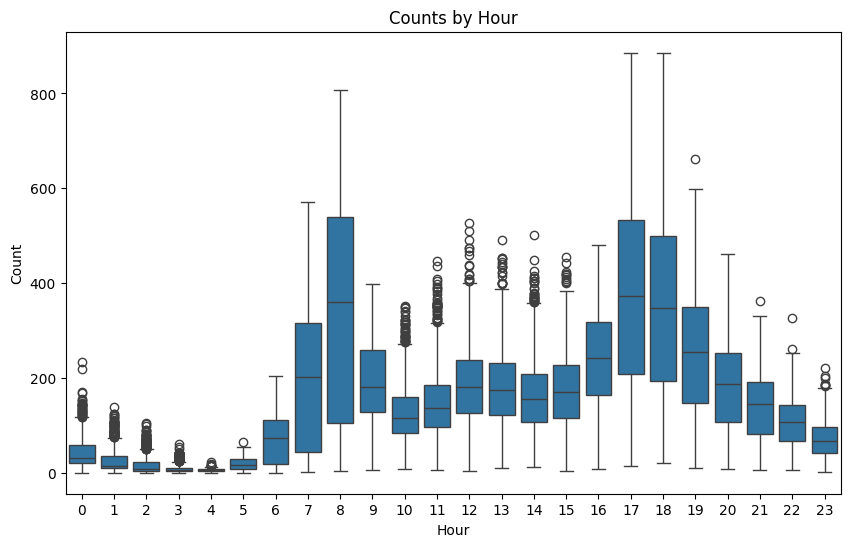

In [99]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x = 'hr', y = 'registered', data=hour)
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Counts by Hour")
plt.show()

In [100]:
hour.loc[(17 < hour['hr']) & (hour['hr'] <19)]['registered'].max()
# The maximum amount of registered riders that the hour 18 ever had over 2 years

886

In [101]:
hour.loc[(17 < hour['hr']) & (hour['hr'] <19)]['casual'].max()
# The maximum amount of casual riders that the hour 18 ever had over 2 years

266

In [102]:
hour.loc[(17 < hour['hr']) & (hour['hr'] <19)]['count'].max()
# The maximum number of riders that the hour 18 ever had over 2 years

977

Histograms

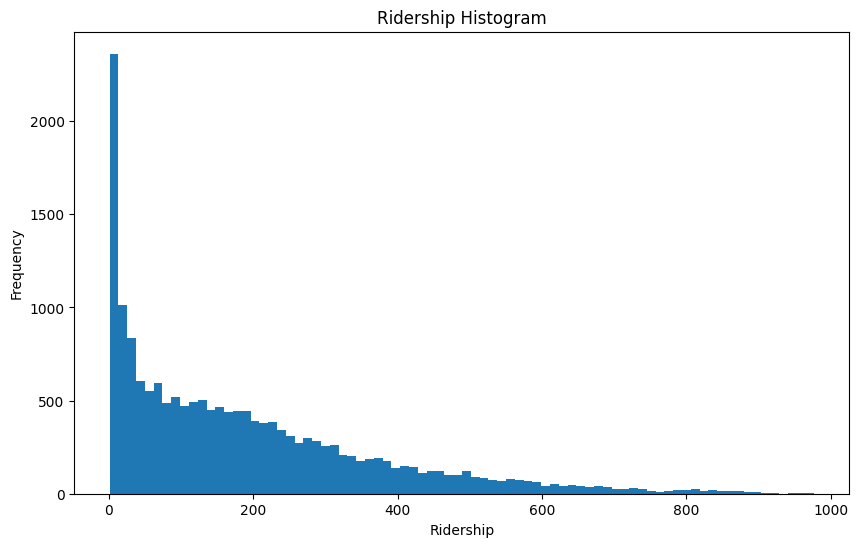

In [103]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(hour['count'], bins=80)
plt.xlabel('Ridership')
plt.ylabel('Frequency')
plt.title("Ridership Histogram")
plt.show()

In a histogram, the height of every bar represents frequency.
In this case, our histogram shows the frequencies of every ridership count.  
- If you look at the x-axis around 800, you’ll see bars that have a height close to 0.This means that very few hours in our dataset had around 800 riders.

- By contrast, at about 200 on the x-axis, you see higher bars, with height closer to 500. This indicates that for close to 500 individual hours in our data ridership was close to 200.

The pattern we see in this histogram is a common one for businesses: many hours have few customers, and few hours have many customers.


## Pair Plot

A pair plot, draws every possible scatterplot for every possible pair of variables in your data:

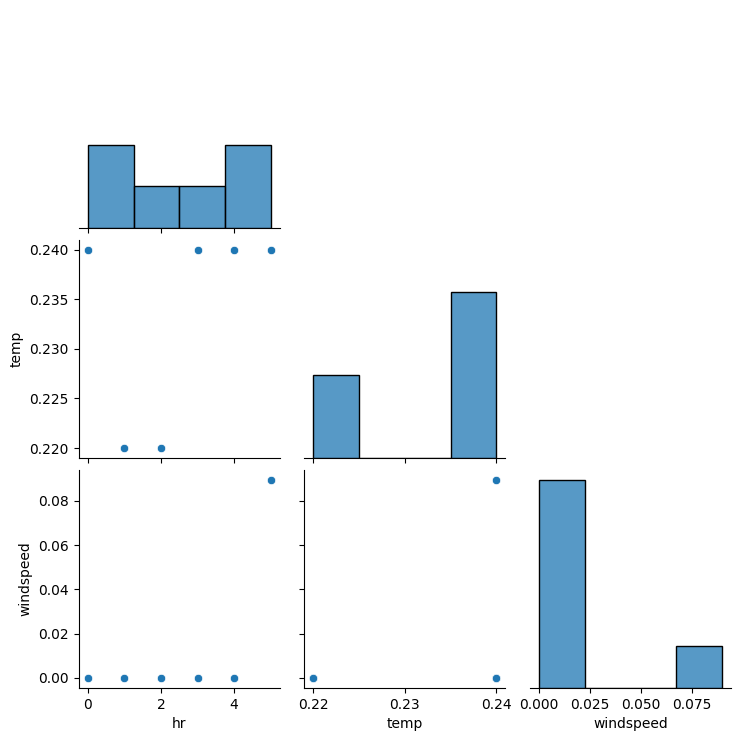

In [104]:
thevariables = ['hr','temp','windspeed']

hour_first100 = hour.loc[0:5, thevariables]
sns.pairplot(hour_first100, corner = True)
plt.show()

In [105]:
variables = ['hr', 'temp', 'windspeed']
hour.loc[0:5, variables]

,hr,temp,windspeed
0,0,0.24,0.0000
1,1,0.22,0.0000
2,2,0.22,0.0000
3,3,0.24,0.0000
4,4,0.24,0.0000
5,5,0.24,0.0896


The pair plot shows scatterplots for every possible combination of variables in the subset of the data we selected, as well as histograms for the individual variables we selected. A lot of data is plotted here, but the scatterplots don’t show much apparent relationship among the variables; these relationships appear to be essentially random.

Sometimes when we draw pair plots, we see more than just randomness. Instead, we can see clear relationships among variables. For example, if we had a measurement of snowfall in our data, we would see that as temperature goes up, snowfall levels go down, and vice versa.